# 1. Import Dependencies

In [1]:
import cv2
import mediapipe as mp
import numpy as np

# 2. OpenCV Feed

In [2]:
cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, frame = cap.read()

    cv2.imshow("Selfie Segmentation", frame)

    if cv2.waitKey(10) &  0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 3. Apply Selfie Segmentation


In [3]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation

In [52]:
cap = cv2.VideoCapture(0)
#create with statement for model 
with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as model:
    #arkaplan resmini belirleme #solutions
    bg_image = np.zeros(frame.shape, dtype=np.uint8)


    while cap.isOpened():
        
        ret, frame = cap.read()

        frame.flags.writeable = False
        frame = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)
        results = model.process(frame)
        frame.flags.writeable = True
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        #solutions
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1 #false true olarak segment alanları belirlendi
        
        bg_image = cv2.imread('bahama.png')# background
        #bg_image = cv2.GaussianBlur(frame,(55,55),0) # blur

        segmented_image = np.where(condition, frame, bg_image) # segment dışı silenerek arka planla birleştirildi
        
        cv2.imshow("Selfie Segmentation", segmented_image)

        if cv2.waitKey(10) &  0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# 4. Process Results

In [53]:
from matplotlib import pyplot as plt
from matplotlib import  gridspec

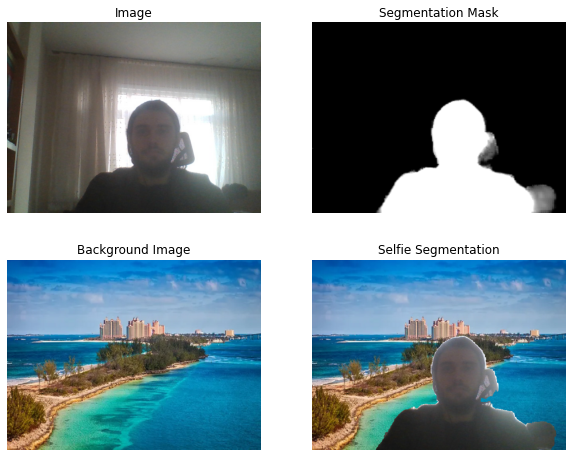

In [54]:
plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,2)

ax0 = plt.subplot(grid[0]) 
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])

ax0.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
ax1.imshow(results.segmentation_mask, cmap='gray')
ax2.imshow(cv2.cvtColor(bg_image, cv2.COLOR_RGB2BGR))
ax3.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))

ax0.title.set_text('Image')
ax1.title.set_text('Segmentation Mask')
ax2.title.set_text('Background Image')
ax3.title.set_text('Selfie Segmentation')

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()

In [49]:
np.stack((results.segmentation_mask,) * 3, axis=-1).shape #-1 reverse

(480, 640, 3)

In [50]:
np.array((results.segmentation_mask,) * 3).shape 

(3, 480, 640)

# 5. Gradio App

In [ ]:
import gradio as gr

def segment(image): 
    with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

webapp.launch()